In [1]:
image_dir = "/home/rafatmatting/dfm/data/alphamatting/images/GT08.png"
mask_path = "/home/rafatmatting/dfm/data/alphamatting/masks/GT08.png"
trimap_path = "/home/rafatmatting/dfm/data/alphamatting/trimaps/GT08.png"

In [151]:
from torch.utils.data import Dataset
from datasets.MattingDataset import MattingDataset
from utils.data import Data
import albumentations as A
import torch.nn.functional as F
import torchvision.transforms.functional as T
import torch
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import torchvision

In [136]:
image_b = Image.open(image_dir)
mask_b = Image.open(mask_path)#.convert("L")
trimap_b = Image.open(trimap_path)#.convert("L")

image = numpy.array(image_b)
mask = numpy.array(mask_b)
trimap = numpy.array(trimap_b)

image = torch.Tensor(image)/255
mask = torch.Tensor(mask)/255
trimap = torch.Tensor(trimap)/255

In [137]:
trimap.shape

torch.Size([2600, 2103])

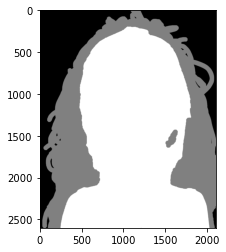

In [138]:
plt.imshow(trimap, cmap="gray")

In [144]:
trimap = trimap.unsqueeze(2)

In [145]:
trimap.shape

torch.Size([2600, 2103, 1])

In [146]:
trimap.unique()

tensor([0.0000, 0.5020, 1.0000])

In [147]:
trimap3 = torch.cat(((trimap < .5), ((trimap > 0) == (trimap < 1)), (trimap > .5)), dim=2)

In [148]:
trimap3 = trimap3 * 255
trimap3.shape

torch.Size([2600, 2103, 3])

In [149]:
torch.unique(trimap3)

tensor([  0, 255])

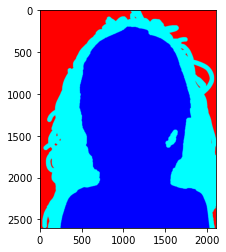

In [150]:
plt.imshow(trimap3)

In [162]:
torchvision.utils.save_image(trimap3.permute(2,0,1)/255, "trimap_3.jpg")
torchvision.utils.save_image(trimap.permute(2,0,1), "trimap_1.jpg")
torchvision.utils.save_image(image.permute(2,0,1), "image.jpg")
torchvision.utils.save_image(mask, "matte.jpg")

In [ ]:
blend = torch.cat(((trimap < .5), ((trimap > 0) == (trimap < 1)), (trimap > .5)), dim=2)

In [163]:
plt.imshow(image*trimap3[:,:,0])

RuntimeError: The size of tensor a (3) must match the size of tensor b (2103) at non-singleton dimension 2